In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pylab as plt
import operator
import pandas as pd
from scipy.interpolate import make_interp_spline
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

In [31]:
#Taking random seed since we need same numbers again when testing multiple times
np.random.seed(9)

In [32]:
x_data = np.linspace(0, 1, 20).reshape((-1,1))
x_nor = np.random.uniform(0, 1, size=20)[:, np.newaxis]
N = np.random.normal(scale=0.3 , size=20 )[:, np.newaxis]
y_data = np.sin(2*np.pi*x_nor) + N
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_nor, y_data, test_size=0.5)

# Displaying Input Data

In [33]:
print('X: ',x_data)
print('Y: ',y_data)

X:  [[0.        ]
 [0.05263158]
 [0.10526316]
 [0.15789474]
 [0.21052632]
 [0.26315789]
 [0.31578947]
 [0.36842105]
 [0.42105263]
 [0.47368421]
 [0.52631579]
 [0.57894737]
 [0.63157895]
 [0.68421053]
 [0.73684211]
 [0.78947368]
 [0.84210526]
 [0.89473684]
 [0.94736842]
 [1.        ]]
Y:  [[ 0.52795547]
 [-0.28199449]
 [-0.01458344]
 [ 1.13450106]
 [ 0.98148157]
 [ 0.99013748]
 [ 0.76539011]
 [ 1.11408167]
 [ 0.65885721]
 [ 0.71874365]
 [ 0.92900287]
 [-0.59259538]
 [-0.45271806]
 [-0.38646788]
 [-0.97408479]
 [ 0.29515021]
 [-1.39950213]
 [-1.14073808]
 [-0.3642625 ]
 [-0.87486422]]


## Creating the model

In [34]:
def LinearReg(x_nor, y_data, Input, degree = 0):
    pol_f = PolynomialFeatures(degree = degree)
    X_Poly = pol_f.fit_transform(x_nor)
    pol_f.fit(X_Poly, y_data)
    model = LinearRegression()
    fit = model.fit(X_Poly, y_data)
    X_plot = pol_f.fit_transform(Input)
    y_pred = model.predict(X_plot)
    
    return y_pred, np.array(fit.coef_)
    

In [35]:
y_pred_0, coef_0 = LinearReg(X_Train, Y_Train, x_data, 0)
y_pred_1, coef_1 = LinearReg(X_Train, Y_Train, x_data, 1)
y_pred_3, coef_3 = LinearReg(X_Train, Y_Train, x_data, 3)
y_pred_9, coef_9 = LinearReg(X_Train, Y_Train, x_data, 9)

In [36]:
pt =  PrettyTable()
pt.field_names = ["W", "M=0","M=1","M=3","M=9"]
pt.add_row(["w0",coef_0[0][0],coef_1[0][0],coef_3[0][0],coef_9[0][0]])
pt.add_row(["w1"," " ,coef_1[0][1],coef_3[0][1],coef_9[0][1]])
pt.add_row(["w2"," " ," ",coef_3[0][2],coef_9[0][2]])
pt.add_row(["w3"," " ," ",coef_3[0][3],coef_9[0][3]])
pt.add_row(["w4"," " ," "," ",coef_9[0][4]])
pt.add_row(["w5"," " ," "," ",coef_9[0][5]])
pt.add_row(["w6"," " ," "," ",coef_9[0][6]])
pt.add_row(["w7"," " ," "," ",coef_9[0][7]])
pt.add_row(["w8"," " ," "," ",coef_9[0][8]])
pt.add_row(["w9"," " ," "," ",coef_9[0][9]])
print(pt)

+----+-----+---------------------+--------------------+---------------------+
| W  | M=0 |         M=1         |        M=3         |         M=9         |
+----+-----+---------------------+--------------------+---------------------+
| w0 | 0.0 |         0.0         |        0.0         |         0.0         |
| w1 |     | -1.7394900387913534 | 18.222017953894955 |  2430.427797177774  |
| w2 |     |                     | -45.50292100808727 | -35946.922592665585 |
| w3 |     |                     | 28.14190350871147  |  258893.8766975938  |
| w4 |     |                     |                    | -1053541.1107813637 |
| w5 |     |                     |                    |  2590907.3886723495 |
| w6 |     |                     |                    |  -3929899.003287445 |
| w7 |     |                     |                    |  3595884.1836211407 |
| w8 |     |                     |                    | -1819709.3983352853 |
| w9 |     |                     |                    |  391063.

# Creating Graphs

In [37]:
def Plot(x,y):
    plt1 = plt.gca()
    plt1.scatter(X_Train, Y_Train, s=10)
    plt1.plot(x, np.sin(2*np.pi*x), color='green')
    plt1.plot(x, y, color='red')
    plt1.set_ylim((-2, 2))
    plt1.set_xlim((0, 1))
    plt1.set_ylabel('Y Value')
    plt1.set_xlabel('X Value')
    plt.show()

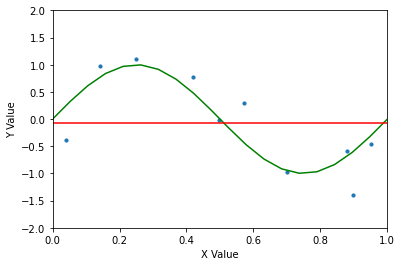

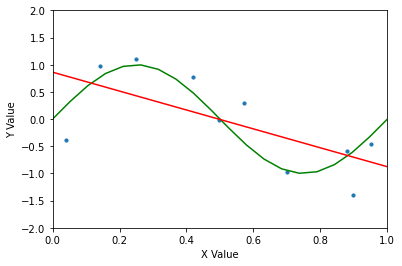

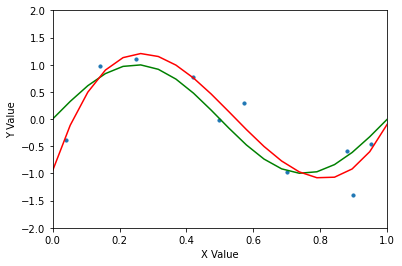

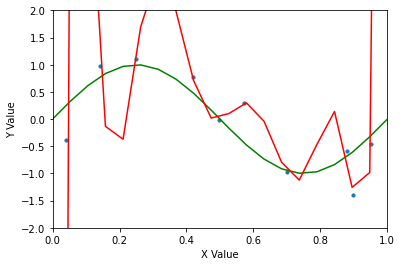

In [38]:
Plot(x_data,y_pred_0)
Plot(x_data,y_pred_1)
Plot(x_data,y_pred_3)
Plot(x_data,y_pred_9)

# Training vs Testing Error

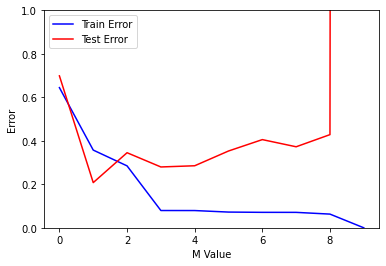

In [39]:
train_err = np.empty(10)
test_err = np.empty(10)

for degree in range(10):
    
    pol_f= PolynomialFeatures(degree=degree)
    x_pol = pol_f.fit_transform(X_Train)
    model = LinearRegression()
    fit = model.fit(x_pol,Y_Train)
    
    train_err[degree] = mean_squared_error(Y_Train ,model.predict(pol_f.fit_transform(X_Train)))
    
    test_err[degree] = mean_squared_error(Y_Test,model.predict(pol_f.fit_transform(X_Test)))

    
plt.plot(np.arange(10), train_err, color='blue', label="Train Error")
plt.plot(np.arange(10), test_err, color='red', label = "Test Error")
plt.ylim((0.0, 1e0))
plt.ylabel("Error")
plt.xlabel("M Value")
plt.legend(loc='upper left')

# Generating 100 values more to fit 9th order model

In [40]:
np.random.seed(9)

In [41]:
x_data_2 = np.linspace(0,1,20).reshape((-1,1))
x2 = np.random.uniform(0, 1, size =100)[:, np.newaxis]
new_N = np.random.normal(scale= 0.3, size = 100)[:, np.newaxis]
y2 = np.sin(2*np.pi*x2)+new_N

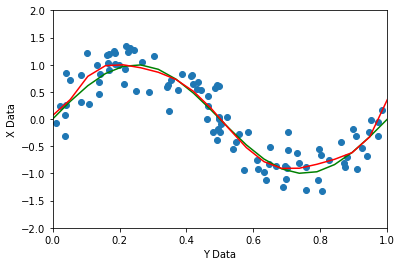

In [42]:
pol_f = PolynomialFeatures(degree=9)
x_pol = pol_f.fit_transform(x2)
pol_f.fit(x_pol, y2)
model = LinearRegression()
fit = model.fit(x_pol, y2)
x_plot = pol_f.fit_transform(x_data_2)
y_pred = model.predict(x_plot)


pl1 = plt.gca()
pl1.scatter(x2, y2)
pl1.plot(x_data_2, np.sin(2*np.pi*x_data_2), color='green')
pl1.plot(x_data_2, y_pred, color='red')
pl1.set_ylim((-2,2))
pl1.set_xlim((0,1))
pl1.set_xlabel('Y Data')
pl1.set_ylabel('X Data')
plt.show()

# Regularization using sum of weights

In [43]:
alpha = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

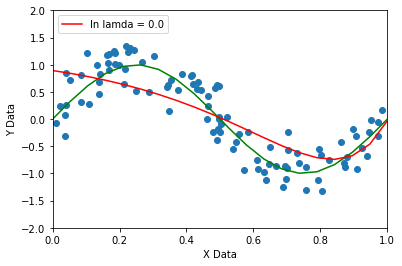

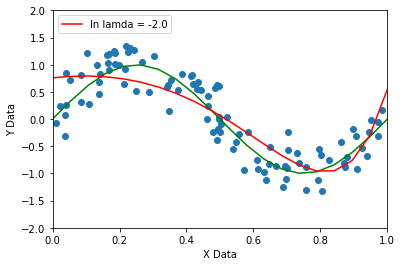

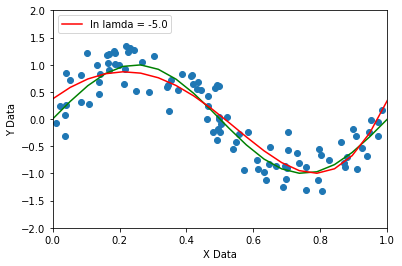

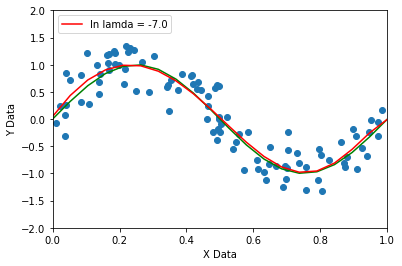

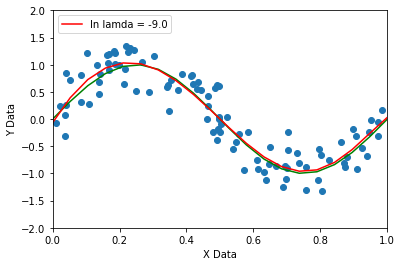

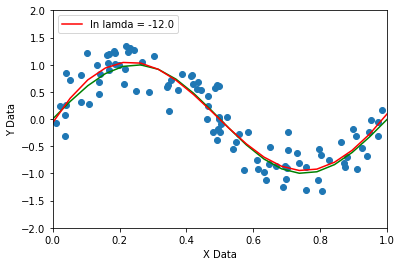

In [44]:
for a in alpha:
    pol_f= PolynomialFeatures(degree=9)
    x_pol = pol_f.fit_transform(x2)
    pol_f.fit(x_pol,y2)
    model = Ridge(alpha=a)
    fit = model.fit(x_pol,y2)
    x_plot = pol_f.fit_transform(x_data_2)
    y_pred = model.predict(x_plot)
    plt3 = plt.gca()

    plt3.scatter(x2, y2)
    plt3.plot(x_data_2, np.sin(2*np.pi*x_data_2), color='green')
    plt3.plot(x_data_2, y_pred, color='r',label="ln lamda = "+str(np.around(np.log(a))))
    plt3.set_ylim((-2, 2))
    plt3.set_xlim((0, 1))
    plt3.set_ylabel('Y Data')
    plt3.set_xlabel('X Data')
    plt3.legend(loc='upper left')
    
    plt.show()

## Training and Test Errors using Regularization

E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52111e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52111e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


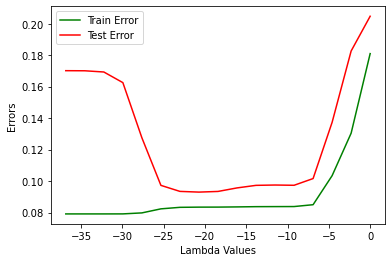

In [45]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.5)
train_error_lambda = []
test_error_lambda = []
alphas = [1.0, 1e-1, 1e-2,  1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16 ]

for alpha in alphas:
    pol_f= PolynomialFeatures(degree=9)
    x_pol = pol_f.fit_transform(x2_train)
    model = Ridge(alpha=alpha)
    fit = model.fit(x_pol,y2_train)
    
    train_error_lambda.append(mean_squared_error(y2_train ,model.predict(pol_f.fit_transform(x2_train))) ) 
    
    test_error_lambda.append(mean_squared_error(y2_test,model.predict(pol_f.fit_transform(x2_test))))

plt.plot(np.log(alphas), train_error_lambda, color='green', label='Train Error')
plt.plot(np.log(alphas), test_error_lambda, color='red', label='Test Error')

plt.ylabel('Errors')
plt.xlabel('Lambda Values')
plt.legend(loc='upper left')